In [5]:
import pandas as pd
data_AdGuard=pd.read_csv("C:\\Users\\xujy\\Desktop\\doh-tunneling\\all\\AdGuard.csv")
data_Cloudflare=pd.read_csv("C:\\Users\\xujy\\Desktop\\doh-tunneling\\all\\Cloudflare.csv")
data_Quad9=pd.read_csv("C:\\Users\\xujy\\Desktop\\doh-tunneling\\all\\Quad9.csv")
data_Google=pd.read_csv("C:\\Users\\xujy\\Desktop\\doh-tunneling\\all\\Google.csv")
# 删除第一列数据
data_AdGuard = data_AdGuard.drop(data_AdGuard.columns[0], axis=1)
data_Cloudflare = data_Cloudflare.drop(data_Cloudflare.columns[0], axis=1)
data_Quad9 = data_Quad9.drop(data_Quad9.columns[0], axis=1)
data_Google = data_Google.drop(data_Google.columns[0], axis=1)
# 将label里的字段值，Benign转换成1，Malicious转换成0
data_AdGuard['label'] = data_AdGuard['label'].map({'Benign': 1, 'Malicious': 0})
data_Cloudflare['label'] = data_Cloudflare['label'].map({'Benign': 1, 'Malicious': 0})
data_Google['label'] = data_Google['label'].map({'Benign': 1, 'Malicious': 0})  
data_Quad9['label'] = data_Quad9['label'].map({'Benign': 1, 'Malicious': 0})

# 打乱数据，原本数据都是先正常后恶意，打乱后可以保证数据的随机性，但是有没有用存疑
data_AdGuard = data_AdGuard.sample(frac=1).reset_index(drop=True)
data_Cloudflare = data_Cloudflare.sample(frac=1).reset_index(drop=True)
data_Quad9 = data_Quad9.sample(frac=1).reset_index(drop=True)
data_Google = data_Google.sample(frac=1).reset_index(drop=True)

In [6]:
def get_X_Y(data):
    X = data.iloc[:, :-1]
    Y = data.iloc[:, -1]
    return X, Y
X_AdGuard, Y_AdGuard = get_X_Y(data_AdGuard)
X_Cloudflare, Y_Cloudflare = get_X_Y(data_Cloudflare)
X_Quad9, Y_Quad9 = get_X_Y(data_Quad9)
X_Google, Y_Google = get_X_Y(data_Google)

In [7]:
# model_utils.py
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report, y_pred
# 交叉验证
def cross_validate_model(model, X, y, cv=5, scoring='roc_auc'):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return cv_scores

def plot_roc_curve(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
# accuracy, report, y_pred = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
# plot_roc_curve(model, X_test, y_test)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
Accuracy = {
    "AdGuard": {"AdGuard": 1, "Cloudflare": 0, "Quad9": 0, "Google": 0},
    "Cloudflare": {"AdGuard": 0, "Cloudflare": 1, "Quad9": 0, "Google": 0},
    "Quad9": {"AdGuard": 0, "Cloudflare": 0, "Quad9": 1, "Google": 0},
    "Google": {"AdGuard": 0, "Cloudflare": 0, "Quad9": 0, "Google": 1}
}

def evaluate_model(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    accuracy, report, y_pred = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f'Accuracy: {accuracy}\n')
    return accuracy

print("Train: AdGuard")
print("Test: Cloudflare")
Accuracy["AdGuard"]["Cloudflare"] = evaluate_model(X_AdGuard, X_Cloudflare, Y_AdGuard, Y_Cloudflare)
print("Test: Quad9")
Accuracy["AdGuard"]["Quad9"] = evaluate_model(X_AdGuard, X_Quad9, Y_AdGuard, Y_Quad9)
print("Test: Google")
Accuracy["AdGuard"]["Google"] = evaluate_model(X_AdGuard, X_Google, Y_AdGuard, Y_Google)

print("Train: Cloudflare")
print("Test: AdGuard")
Accuracy["Cloudflare"]["AdGuard"] = evaluate_model(X_Cloudflare, X_AdGuard, Y_Cloudflare, Y_AdGuard)
print("Test: Quad9")
Accuracy["Cloudflare"]["Quad9"] = evaluate_model(X_Cloudflare, X_Quad9, Y_Cloudflare, Y_Quad9)
print("Test: Google")
Accuracy["Cloudflare"]["Google"] = evaluate_model(X_Cloudflare, X_Google, Y_Cloudflare, Y_Google)

print("Train: Quad9")
print("Test: AdGuard")
Accuracy["Quad9"]["AdGuard"] = evaluate_model(X_Quad9, X_AdGuard, Y_Quad9, Y_AdGuard)
print("Test: Cloudflare")
Accuracy["Quad9"]["Cloudflare"] = evaluate_model(X_Quad9, X_Cloudflare, Y_Quad9, Y_Cloudflare)
print("Test: Google")
Accuracy["Quad9"]["Google"] = evaluate_model(X_Quad9, X_Google, Y_Quad9, Y_Google)

print("Train: Google")
print("Test: AdGuard")
Accuracy["Google"]["AdGuard"] = evaluate_model(X_Google, X_AdGuard, Y_Google, Y_AdGuard)
print("Test: Cloudflare")
Accuracy["Google"]["Cloudflare"] = evaluate_model(X_Google, X_Cloudflare, Y_Google, Y_Cloudflare)
print("Test: Quad9")
Accuracy["Google"]["Quad9"] = evaluate_model(X_Google, X_Quad9, Y_Google, Y_Quad9)

Train: AdGuard
Test: Cloudflare
Accuracy: 0.9436959837315709

Test: Quad9
Accuracy: 0.9752398867142917

Test: Google
Accuracy: 0.8709677419354839

Train: Cloudflare
Test: AdGuard
Accuracy: 0.830226626115962

Test: Quad9
Accuracy: 0.9722492285581434

Test: Google
Accuracy: 0.9512507660593905

Train: Quad9
Test: AdGuard
Accuracy: 0.9924457961346022

Test: Cloudflare
Accuracy: 0.9830960854092526

Test: Google
Accuracy: 0.9676862220736532

Train: Google
Test: AdGuard
Accuracy: 0.9993132541940547

Test: Cloudflare
Accuracy: 0.9860193187595323

Test: Quad9
Accuracy: 0.9990277719068352



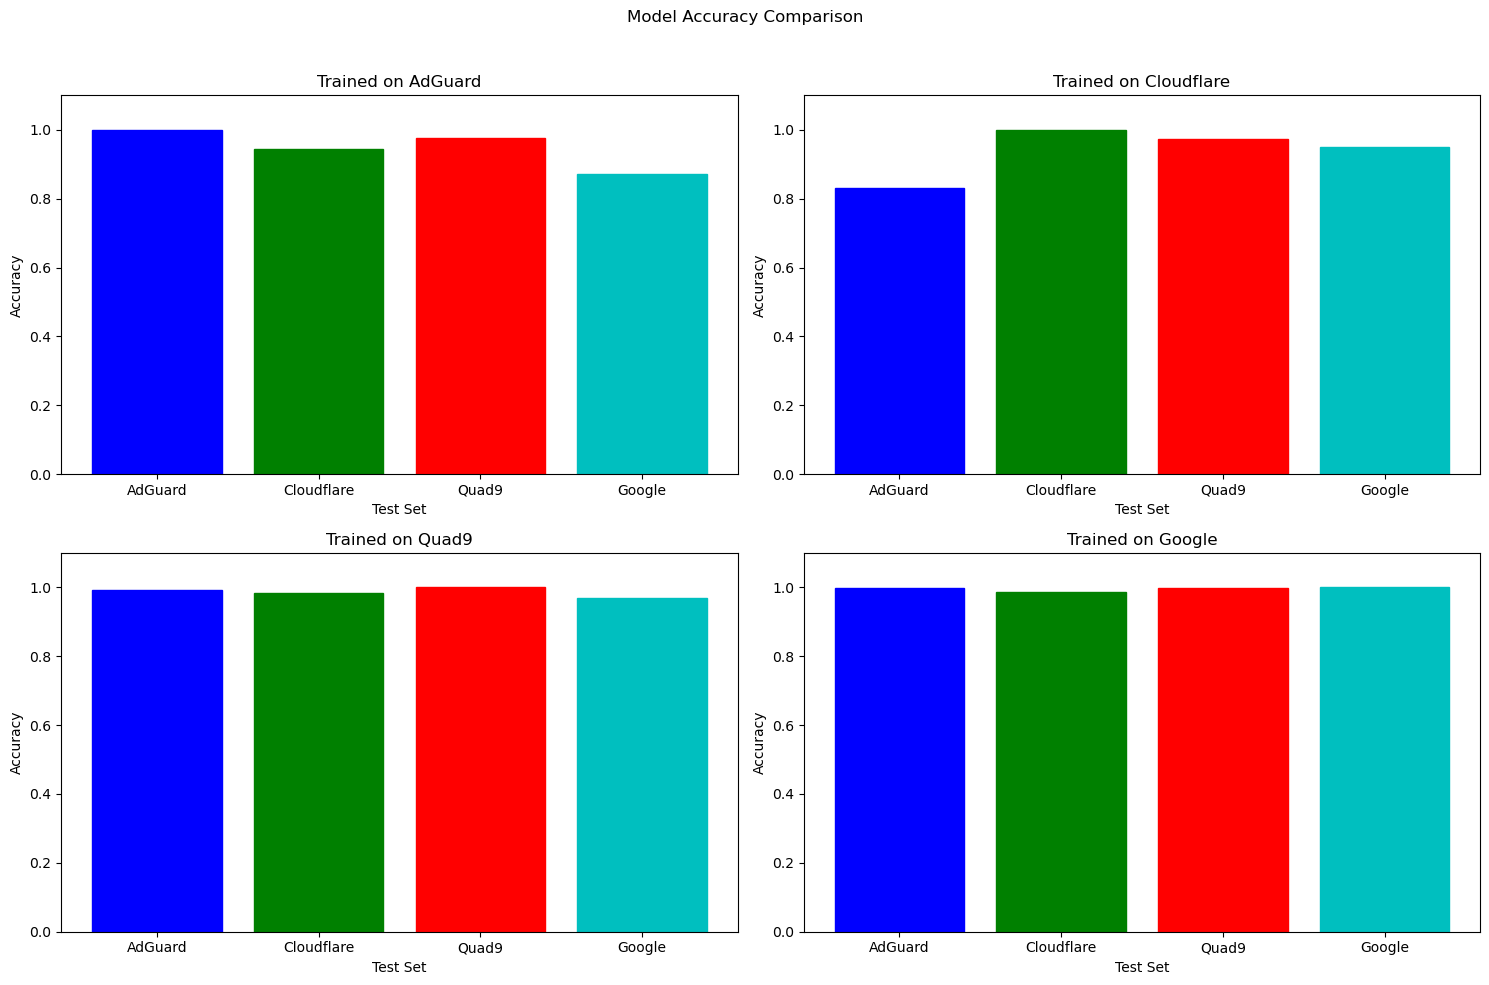

In [14]:
import matplotlib.pyplot as plt

# 绘制柱状图的函数
def plot_accuracy_bars(accuracy_dict):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Accuracy Comparison')

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # 颜色列表

    for i, (train_set, test_sets) in enumerate(accuracy_dict.items()):
        ax = axes[i // 2, i % 2]
        bars = ax.bar(test_sets.keys(), test_sets.values(), color=colors[:len(test_sets)])
        ax.set_title(f'Trained on {train_set}')
        ax.set_ylim(0, 1.1)
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Test Set')

        # 为每个柱状图添加颜色
        for bar, color in zip(bars, colors):
            bar.set_color(color)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# 调用函数绘制柱状图
plot_accuracy_bars(Accuracy)
